In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score

In [2]:
df = pd.read_csv("https://stooq.pl/q/d/l/?s=wig20&i=d", index_col=0)

In [3]:
df

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
1991-04-16,100.00,100.00,100.00,100.00,325.0
1991-04-23,95.70,95.70,95.70,95.70,5905.0
1991-04-30,93.50,93.50,93.50,93.50,7162.0
1991-05-14,92.90,92.90,92.90,92.90,18300.0
1991-05-21,95.50,95.50,95.50,95.50,14750.0
...,...,...,...,...,...
2023-12-06,2302.28,2329.05,2297.34,2309.81,20036714.0
2023-12-07,2302.98,2303.44,2270.20,2288.84,13681706.0
2023-12-08,2290.85,2316.02,2290.85,2306.05,14582525.0


In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.rename(columns={"Data": "Date", "Otwarcie": "Open", "Najwyzszy": "High", "Najnizszy": "Low", "Zamkniecie": "Close", "Wolumen": "Volume"}, inplace=True)

<Axes: xlabel='Data'>

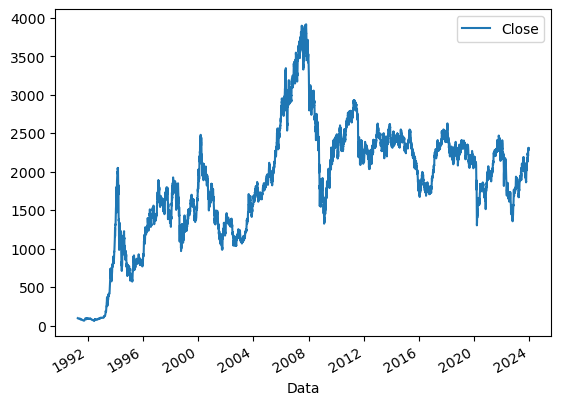

In [6]:
df.plot.line(y="Close",use_index=True)

In [7]:
df["Tomorrow"] = df["Close"].shift(-1)

In [8]:
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

In [9]:
predictors = ["Open", "High", "Low", "Close", "Volume"]
horizons = [2, 5, 60, 250, 1000]
for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
    predictors += [ratio_column, trend_column]

In [10]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Data,,,,,,,,,,,,,,,,,
1991-04-16,100.00,100.00,100.00,100.00,325.0,95.70,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-23,95.70,95.70,95.70,95.70,5905.0,93.50,0,0.978028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,93.50,93.50,93.50,93.50,7162.0,92.90,0,0.988372,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-14,92.90,92.90,92.90,92.90,18300.0,95.50,1,0.996781,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-21,95.50,95.50,95.50,95.50,14750.0,94.60,0,1.013800,1.0,0.999791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06,2302.28,2329.05,2297.34,2309.81,20036714.0,2288.84,0,1.002393,2.0,1.013887,3.0,1.110473,32.0,1.173786,131.0,1.190652,503.0
2023-12-07,2302.98,2303.44,2270.20,2288.84,13681706.0,2306.05,1,0.995440,1.0,0.998234,3.0,1.097409,31.0,1.161810,130.0,1.179695,503.0
2023-12-08,2290.85,2316.02,2290.85,2306.05,14582525.0,2313.32,1,1.003745,1.0,1.003982,3.0,1.102680,31.0,1.169239,130.0,1.188441,503.0


In [11]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Data,,,,,,,,,,,,,,,,,
1997-02-06,1717.20,1779.80,1717.20,1779.80,4435886.0,1799.00,1,1.022962,2.0,1.046818,4.0,1.193378,35.0,1.293049,132.0,2.094378,530.0
1997-02-07,1778.20,1808.70,1778.20,1799.00,5448243.0,1783.30,0,1.005365,2.0,1.040582,4.0,1.201127,36.0,1.304405,133.0,2.112737,531.0
1997-02-10,1797.40,1797.40,1780.30,1783.30,6513315.0,1832.00,1,0.995617,1.0,1.020720,3.0,1.185600,36.0,1.290542,132.0,2.090151,531.0
1997-02-11,1803.30,1832.20,1803.30,1832.00,5146340.0,1810.20,0,1.013471,1.0,1.029908,4.0,1.211943,37.0,1.323125,132.0,2.142862,532.0
1997-02-12,1824.60,1824.60,1804.90,1810.20,5748398.0,1887.90,1,0.994015,1.0,1.005186,3.0,1.191696,37.0,1.305016,131.0,2.113125,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-05,2274.56,2316.04,2273.02,2298.78,19136348.0,2309.81,1,1.003874,1.0,1.016845,2.0,1.108370,32.0,1.169570,130.0,1.185122,502.0
2023-12-06,2302.28,2329.05,2297.34,2309.81,20036714.0,2288.84,0,1.002393,2.0,1.013887,3.0,1.110473,32.0,1.173786,131.0,1.190652,503.0
2023-12-07,2302.98,2303.44,2270.20,2288.84,13681706.0,2306.05,1,0.995440,1.0,0.998234,3.0,1.097409,31.0,1.161810,130.0,1.179695,503.0


In [12]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds = (preds >= 0.6).astype(int)
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [13]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [14]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=1)

In [15]:
model = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [2, 10, 50],
    'max_depth': [None, 10, 20, 30]
}

In [16]:
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_model.fit(train_data[predictors], train_data["Target"])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 50],
                         'n_estimators': [100, 200, 500]})

In [17]:
print("Best parameteres:", CV_model.best_params_)
best_model = CV_model.best_estimator_

Best parameteres: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [18]:
predictions = backtest(df, best_model, predictors)

In [19]:
print(predictions["Predictions"].value_counts())

0    3616
1     604
Name: Predictions, dtype: int64


In [20]:
print(predictions["Target"].value_counts() / predictions.shape[0])

1    0.500237
0    0.499763
Name: Target, dtype: float64


In [21]:
print("Precision of the model:", precision_score(predictions["Target"], predictions["Predictions"]))

Precision of the model: 0.543046357615894
